In [1]:
#https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794
#https://wisdomml.in/bag-of-words-bow-model-with-complete-implementation-in-python/
#https://stackabuse.com/python-for-nlp-creating-bag-of-words-model-from-scratch/
#https://colab.research.google.com/github/goodboychan/goodboychan.github.io/blob/main/_notebooks/2020-07-17-03-N-Gram-models.ipynb
#https://colab.research.google.com/github/PradipNichite/Youtube-Tutorials/blob/main/Youtube_NLP_Text_Representaion.ipynb#scrollTo=rynjIW1f87JV
#https://github.com/hminooei/DSbyHadi/blob/master/Tutorial3/sentiment-analysis-bow.ipynb
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c
#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

import json
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, model_selection, pipeline, manifold, preprocessing, feature_selection
import gensim
import gensim.downloader as gensim_api

data = pd.read_csv('Scombined.csv')

#data.drop(['length'], inplace = True, axis = 1)
data

#Self text column is the raw version of the posts
#Clean > cleaned from hyperlinks
#text > lowered, cleaned from punctuation
#rem2 is cleaned, tokenized, stopwords removed

,selftext,y,clean,text,length,rem2
0,I've used this app called 'Relax Melodies' for...,0,I've used this app called 'Relax Melodies' for...,i ve used this app called relax melodies for o...,886,used app called relax melodies two years app i...
1,I felt reasonably tired at my bed time. I got ...,0,I felt reasonably tired at my bed time. I got ...,i felt reasonably tired at my bed time i got i...,214,felt reasonably tired bed time got bed closed ...
2,And to hear how they slept poorly the next day...,0,And to hear how they slept poorly the next day...,and to hear how they slept poorly the next day...,61,hear slept poorly next day luxury
3,"Whenever it is warm outside, there is a bird t...",0,"Whenever it is warm outside, there is a bird t...",whenever it is warm outside there is a bird th...,255,whenever warm outside bird chirps outside wind...
4,I was on 20-25mg Mirtazapine (Remeron) over th...,0,I was on 20-25mg Mirtazapine (Remeron) over th...,i was on mg mirtazapine remeron over the ...,977,mg mirtazapine remeron past years months ago b...
...,...,...,...,...,...,...
18394,"I’ve been at day 4, not many times, it’s where...",1,"I’ve been at day 4, not many times, it’s where...",i ve been at day not many times it s where i...,512,day many times incredible moodiness overwhelmi...
18395,"Hi, everyone I’m a new poster in this sub but ...",1,"Hi, everyone I’m a new poster in this sub but ...",hi everyone i m a new poster in this sub but i...,1469,hi everyone new poster sub trying see anyone e...
18396,"I have a very hard time falling asleep, I can ...",1,"I have a very hard time falling asleep, I can ...",i have a very hard time falling asleep i can b...,183,hard time falling asleep exhausted cant switch...
18397,anyone else rly want to sleep and feel tired b...,1,anyone else rly want to sleep and feel tired b...,anyone else rly want to sleep and feel tired b...,107,anyone else rly want sleep feel tired get anxi...


In [2]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.4 MB/s eta 0:00:00


In [86]:
# split train dataset into train, validation and test sets

from sklearn.model_selection import train_test_split

X_train, temp_text, y_train, temp_labels = train_test_split(data['text'], data['y'],
                                                                    random_state=20,
                                                                    test_size=0.4,
                                                                    stratify=data['y'])


X_val, X_test, y_val, y_test = train_test_split(temp_text, temp_labels,
                                                                random_state=20,
                                                              test_size=0.5,
                                                              stratify=temp_labels)

In [ ]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

In [ ]:
print(y_test.value_counts())
print(y_val.value_counts())
print(y_train.value_counts())

In [57]:
from sklearn.feature_extraction import text
stop_wordse = list(text.ENGLISH_STOP_WORDS)

stop_words1 = list(text.ENGLISH_STOP_WORDS.union(['covid']))
stop_words2 = list(text.ENGLISH_STOP_WORDS.union(['quarantine']))
stop_words3 = list(text.ENGLISH_STOP_WORDS.union(['pandemic']))
stop_words4 = list(text.ENGLISH_STOP_WORDS.union(['lockdown']))
stop_words5 = list(text.ENGLISH_STOP_WORDS.union(['covid', 'quarantine', 'pandemic','lockdown']))

stop_words6 = text.ENGLISH_STOP_WORDS.union(['ambien'])
stop_words7 = text.ENGLISH_STOP_WORDS.union(['seroquel'])
stop_words8 = text.ENGLISH_STOP_WORDS.union(['trazadone'])
stop_words9 = text.ENGLISH_STOP_WORDS.union(['xanax'])
stop_words10 = text.ENGLISH_STOP_WORDS.union(['benadryl'])
stop_words11= text.ENGLISH_STOP_WORDS.union(['benadryl', 'ambien', 'seroquel', 'trazadone', 'xanax'])


stop_words12 = text.ENGLISH_STOP_WORDS.union(['anxiety', 'anxious'])
stop_words13 = text.ENGLISH_STOP_WORDS.union(['depressed', 'depression'])
stop_words14 = text.ENGLISH_STOP_WORDS.union(['scared', 'fear', 'afraid', 'worry'])
stop_words15 = text.ENGLISH_STOP_WORDS.union(['stressed', 'stress'])


stop_words16 = text.ENGLISH_STOP_WORDS.union(['health'])
stop_words17 = text.ENGLISH_STOP_WORDS.union(['safe'])
stop_words18 = text.ENGLISH_STOP_WORDS.union(['virus'])
stop_words19 = text.ENGLISH_STOP_WORDS.union(['insomnia'])
stop_words20 = text.ENGLISH_STOP_WORDS.union(['covid', 'lockdown', 'pandemic', 'quarantine', 'virus'])

In [ ]:
len(stop_wordse)

In [87]:
###### BOW-COUNT n-grams

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

#(stop_words = 'english', max_df = 0.5, min_df = 10, max_features=200, ngram_range=(1,3))
Cvectorizer = feature_extraction.text.CountVectorizer(min_df = 10, max_features=3000, stop_words=stop_words5, ngram_range=(1,3))
Cvectorizerv = feature_extraction.text.CountVectorizer(min_df = 10, max_features=3000, stop_words=stop_words5, ngram_range=(1,3))
Cvectorizert = feature_extraction.text.CountVectorizer(min_df = 10,max_features=3000, stop_words=stop_words5,ngram_range=(1,3))

corpustrain = X_train.values.astype('U')
Cvectorizer.fit(corpustrain)
X_trainC = Cvectorizer.transform(corpustrain)#.toarray()
#dic_vocabulary = Cvectorizer.vocabulary_

corpusval = X_val.values.astype('U')
Cvectorizerv.fit(corpusval)
X_valC = Cvectorizerv.transform(corpusval)#.toarray()
#dic_vocabularyv = Cvectorizerv.vocabulary_

corpustest = X_test.values.astype('U')
Cvectorizert.fit(corpustest)
X_testC = Cvectorizert.transform(corpustest)#.toarray()
#dic_vocabularyt = Cvectorizert.vocabulary_

namedtrain=pd.DataFrame(X_trainC.toarray(),columns=Cvectorizer.get_feature_names_out())
namedval=pd.DataFrame(X_valC.toarray(),columns=Cvectorizerv.get_feature_names_out())
namedtest=pd.DataFrame(X_testC.toarray(),columns=Cvectorizert.get_feature_names_out())

In [ ]:
'''###CHI-SQUARE FEATURE SELECTION FOR TRAIN SET

X_names = Cvectorizer.get_feature_names()
p_value_limit = 0.999
dtf_features = pd.DataFrame()
for cat in np.unique(y_train):
    chi2, p = feature_selection.chi2(namedtrain, y_train==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"],
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names = dtf_features["feature"].unique().tolist()


for cat in np.unique(y_train):
    print("# {}:".format(cat))
    print("  . selected features:",
         len(dtf_features[dtf_features["y"]==cat]))
    print("  . top features:", ",".join(
dtf_features[dtf_features["y"]==cat]["feature"].values[:]))
    print(" ")


print(namedtrain.shape)'''

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 0:
  . selected features: 45
  . top features: covid,pandemic,quarantine,lockdown,summer,hypnic,jerks,benadryl,nyquil,dude,hypnic jerks,gym,saturday,fuck,mattress,sleeping schedule,use,time bed,game,rn,internet,march,act,efficiency,went,sex,struggled,hangover,trauma,difficulty,wind,travel,bed,gp,friday,onset,trip,exam,worrying,health,lay awake,milk,jerk,missing,partner
 
# 1:
  . selected features: 45
  . top features: covid,pandemic,quarantine,lockdown,summer,hypnic,jerks,benadryl,nyquil,dude,hypnic jerks,gym,saturday,fuck,mattress,sleeping schedule,use,time bed,game,rn,internet,march,act,efficiency,went,sex,struggled,hangover,trauma,difficulty,wind,travel,bed,gp,friday,onset,trip,exam,worrying,health,lay awake,milk,jerk,missing,partner
 
(11039, 3000)


/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_55661/131635279.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtf_features = dtf_features.append(pd.DataFrame(
/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_55661/131635279.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtf_features = dtf_features.append(pd.DataFrame(


In [ ]:
'''###CHI-SQUARE FEATURE SELECTION FOR VAL SET

Xv_names = Cvectorizerv.get_feature_names()
p_value_limit = 0.999
dtfv_features = pd.DataFrame()
for cat in np.unique(y_val):
    chi2, p = feature_selection.chi2(namedval, y_val==cat)
    dtfv_features = dtfv_features.append(pd.DataFrame(
                   {"feature":Xv_names, "score":1-p, "y":cat}))
    dtfv_features = dtfv_features.sort_values(["y","score"],
                    ascending=[True,False])
    dtfv_features = dtfv_features[dtfv_features["score"]>p_value_limit]
Xv_names = dtfv_features["feature"].unique().tolist()


for cat in np.unique(y_val):
    print("# {}:".format(cat))
    print("  . selected features:",
         len(dtfv_features[dtfv_features["y"]==cat]))
    print("  . top features:", ",".join(
dtfv_features[dtfv_features["y"]==cat]["feature"].values[:]))
    print(" ")'''

# 0:
  . selected features: 18
  . top features: covid,quarantine,pandemic,health,sleep,class,tired,cbt,ambien,lockdown,imagine,gp,mental health,matter,shifts,eat,diphenhydramine,magnesium
 
# 1:
  . selected features: 18
  . top features: covid,quarantine,pandemic,health,sleep,class,tired,cbt,ambien,lockdown,imagine,gp,mental health,matter,shifts,eat,diphenhydramine,magnesium
 


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_55661/1773871864.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtfv_features = dtfv_features.append(pd.DataFrame(
/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_55661/1773871864.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtfv_features = dtfv_features.append(pd.DataFrame(


In [ ]:
'''###CHI-SQUARE FEATURE SELECTION FOR TEST SET

Xt_names = Cvectorizert.get_feature_names()
p_value_limit = 0.999
dtft_features = pd.DataFrame()
for cat in np.unique(y_test):
    chi2, p = feature_selection.chi2(namedtest, y_test==cat)
    dtft_features = dtft_features.append(pd.DataFrame(
                   {"feature":Xt_names, "score":1-p, "y":cat}))
    dtft_features = dtft_features.sort_values(["y","score"],
                    ascending=[True,False])
    dtft_features = dtft_features[dtft_features["score"]>p_value_limit]
Xt_names = dtft_features["feature"].unique().tolist()


for cat in np.unique(y_test):
    print("# {}:".format(cat))
    print("  . selected features:",
         len(dtft_features[dtft_features["y"]==cat]))
    print("  . top features:", ",".join(
dtft_features[dtft_features["y"]==cat]["feature"].values[:]))
    print(" ")'''

# 0:
  . selected features: 25
  . top features: covid,quarantine,summer,pandemic,lockdown,wow,life,insomnia,people,wish,screaming,great,better,mattress,schedule,fat,sleep better,mgs,november,lot,believed,able sleep,deal,job,able
 
# 1:
  . selected features: 25
  . top features: covid,quarantine,summer,pandemic,lockdown,wow,life,insomnia,people,wish,screaming,great,better,mattress,schedule,fat,sleep better,mgs,november,lot,believed,able sleep,deal,job,able
 


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_55661/54156426.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtft_features = dtft_features.append(pd.DataFrame(
/var/folders/wd/1sxcpd491kg32hysvmfw5d3r0000gn/T/ipykernel_55661/54156426.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dtft_features = dtft_features.append(pd.DataFrame(


In [88]:
#Let's see the common features for train, val, and test without CHI-SQUARE

print(len(list(namedtrain.columns)), len(list(namedval.columns)), len(list(namedtest.columns)))
trainval = pd.concat([namedtrain, namedval], axis=0, join = 'inner')
three = pd.concat([trainval, namedtest], axis=0, join = 'inner')
print(three.shape)

comcol = three.columns
len(comcol)

3000 3000 3000
(18399, 2423)


2423

In [ ]:
'''
#Let's see the common features for train, val, and test AFTER CHI-SQUARE

print(len(X_names), len(Xv_names), len(Xt_names))
trainvalnames = pd.concat([namedtrain[X_names], namedval[Xv_names]], axis=0, join = 'inner')
threenames = pd.concat([trainvalnames, namedtest[Xt_names]], axis=0, join = 'inner')
print(threenames.shape)
print(threenames.columns)


For .95

covid', 'lockdown', 'pandemic', 'quarantine', 'virus', 'nyquil',
       'doesnt', 'sleep aid', 'could', 'ambien', 'insomnia

For .999
'covid', 'pandemic', 'quarantine', 'lockdown'
'''

45 18 25
(18399, 4)
Index(['covid', 'pandemic', 'quarantine', 'lockdown'], dtype='object')


In [ ]:
print(namedtrain.columns[:100]) #n grams

Text(0.5, 1.0, 'Sparse Matrix Count Vectorizer')

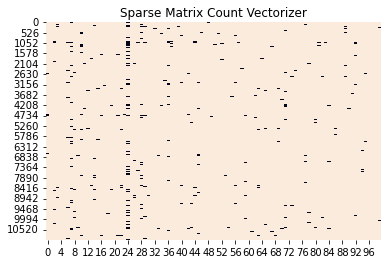

In [ ]:
#for Cvectorizer
sns.heatmap(X_trainC.todense()[:,np.random.randint(0,X_trainC.shape[1],100)]==0, vmin=0, vmax=1, cbar=False).set_title('Sparse Matrix Count Vectorizer')

In [ ]:
'''grid_search(stop_words_list=['english', None], ngram_ranges_list=[(1,2), (1,3)], max_features_list=[2000, 5000, 60000],,
            norm_list=['l2', 'l1'], use_idf_list=[True, False],
            penalty_list=['l1', 'l2'], C_list=[.01, 0.07, 0.1, 0.2, 0.9])'''

"grid_search(stop_words_list=['english', None], ngram_ranges_list=[(1,2), (1,3)], max_features_list=[2000, 5000, 60000],,\n            norm_list=['l2', 'l1'], use_idf_list=[True, False],\n            penalty_list=['l1', 'l2'], C_list=[.01, 0.07, 0.1, 0.2, 0.9])"

 Accuracy: 0.5445652173913044
Precision: 0.5248161764705882
 Recall: 0.33005780346820807
 F1: 0.4052519517388218


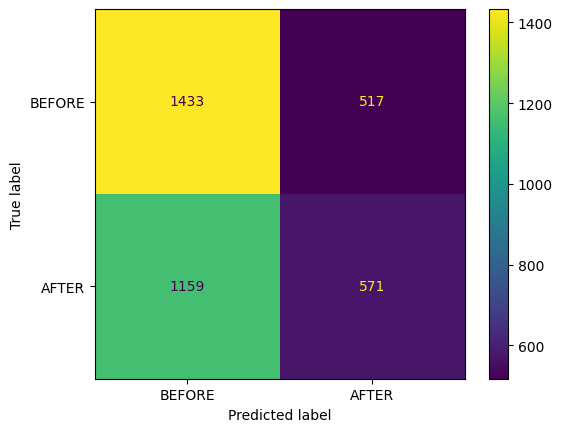

'\nLAST\n\n Accuracy: 0.5502717391304348\nPrecision: 0.5349487418452936\n Recall: 0.33179190751445087\n F1: 0.40956118444523726\n\n '

In [89]:
###For n-gram BoW features with x common features for all three sets

from sklearn.svm import SVC, LinearSVC
from sklearn import metrics

# train the model on train set

#(C=1.0, kernel='linear', degree=3, gamma='auto')
model = SVC()
model.fit(namedtrain[comcol],y_train)

# print prediction results
predicted = model.predict(namedval[comcol])                             #predict on validation set :)
#print(classification_report(y_val, predicted))

print(" Accuracy:",metrics.accuracy_score(y_val, predicted))
print("Precision:",metrics.precision_score(y_val, predicted))
print(" Recall:",metrics.recall_score(y_val, predicted))
print(" F1:",metrics.f1_score(y_val, predicted))

confusion_matrix = metrics.confusion_matrix(y_val, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['BEFORE', 'AFTER'])
cm_display.plot()
plt.show()

'''
LAST

 Accuracy: 0.5502717391304348
Precision: 0.5349487418452936
 Recall: 0.33179190751445087
 F1: 0.40956118444523726

 '''

In [ ]:
'''#For n-gram BoW features

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10]}

grid = GridSearchCV(SVC(kernel = 'linear'), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(namedtrain,y_train)'''

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .............................C=0.1;, score=0.562 total time= 1.2min
[CV 2/5] END .............................C=0.1;, score=0.551 total time= 1.1min
[CV 3/5] END .............................C=0.1;, score=0.558 total time= 1.2min
[CV 4/5] END .............................C=0.1;, score=0.554 total time= 1.2min
[CV 5/5] END .............................C=0.1;, score=0.546 total time= 1.2min
[CV 1/5] END ...............................C=1;, score=0.572 total time= 2.0min
[CV 2/5] END ...............................C=1;, score=0.545 total time= 2.0min
[CV 3/5] END ...............................C=1;, score=0.544 total time= 2.7min
[CV 4/5] END ...............................C=1;, score=0.535 total time= 8.5min
[CV 5/5] END ...............................C=1;, score=0.537 total time= 9.8min


In [ ]:
'''# print best parameter after tuning
print(grid.best_params_)
#{'C': 1}

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)'''

"# print best parameter after tuning\nprint(grid.best_params_)\n#{'C': 1}\n\n# print how our model looks after hyper-parameter tuning\nprint(grid.best_estimator_)"

In [90]:
# combine train and validate sets for shared features

print('namedtrain shape:', namedtrain.shape, 'namedval shape:', namedval.shape)
X_train = pd.concat([namedtrain[comcol], namedval[comcol]], axis=0, join = 'inner')
print('X_train shape:', X_train.shape)
#X_train.columns = [''] * len(X_train.columns)
Y_train = pd.concat([y_train, y_val], axis=0)
print('Y_train shape:', Y_train.shape, 'y_train shape:', y_train.shape, 'y_val shape:', y_val.shape)

X_test = namedtest[comcol]
#X_test.columns = [''] * len(namedtest[comcol].columns)
X_test

namedtrain shape: (11039, 3000) namedval shape: (3680, 3000)
X_train shape: (14719, 2423)
Y_train shape: (14719,) y_train shape: (11039,) y_val shape: (3680,)


,ability,ability sleep,able,able fall,able fall asleep,able sleep,able sleep night,absolute,absolutely,accept,...,young,younger,youtube,zero,zero sleep,zoloft,zolpidem,zombie,zopiclone,zzzquil
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics

model2 = SVC(kernel='linear')
model2.fit(X_train,Y_train)
predicted = model2.predict(X_test)                            #predict on test set :)

print(" Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print(" Recall:",metrics.recall_score(y_test, predicted))
print(" F1:",metrics.f1_score(y_test, predicted))

'''
LAST

Accuracy: 0.5592391304347826
Precision: 0.5359784801613988
 Recall: 0.4609600925390399
 F1: 0.49564676616915426

'''

 Accuracy: 0.5529891304347826
Precision: 0.5275229357798165
 Recall: 0.46558704453441296
 F1: 0.4946236559139785


'\nLAST\n\nAccuracy: 0.5592391304347826\nPrecision: 0.5359784801613988\n Recall: 0.4609600925390399\n F1: 0.49564676616915426\n\n'

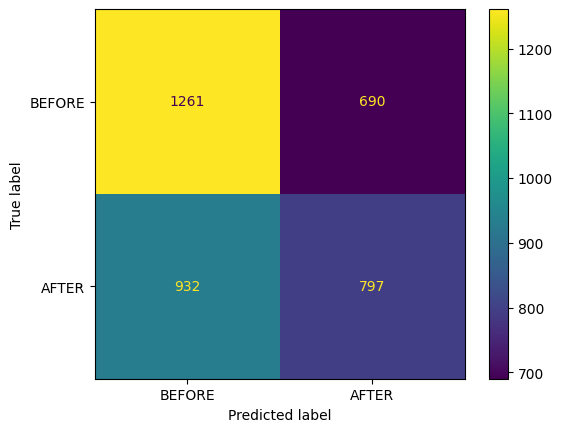

In [12]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['BEFORE', 'AFTER'])
cm_display.plot()
plt.show()


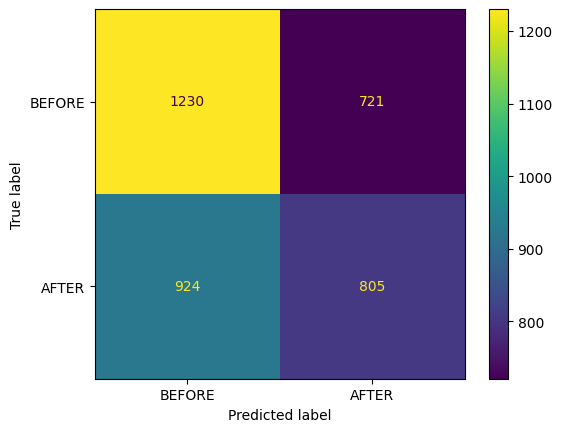

In [94]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['BEFORE', 'AFTER'])
cm_display.plot()
plt.show()  #cov removed

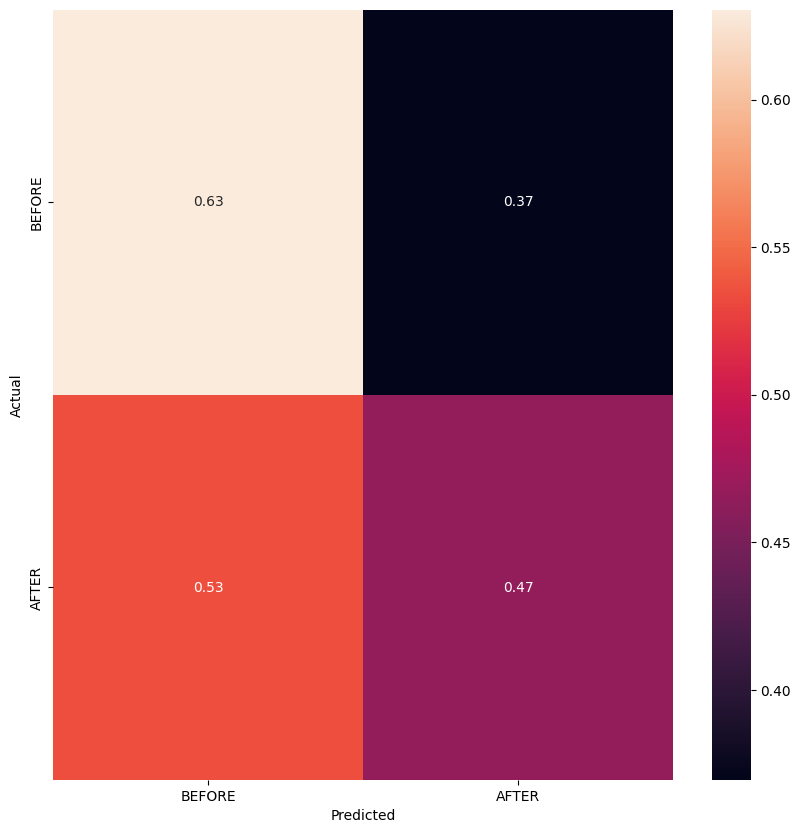

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=['BEFORE', "AFTER"], yticklabels=['BEFORE', 'AFTER'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

<Axes: >

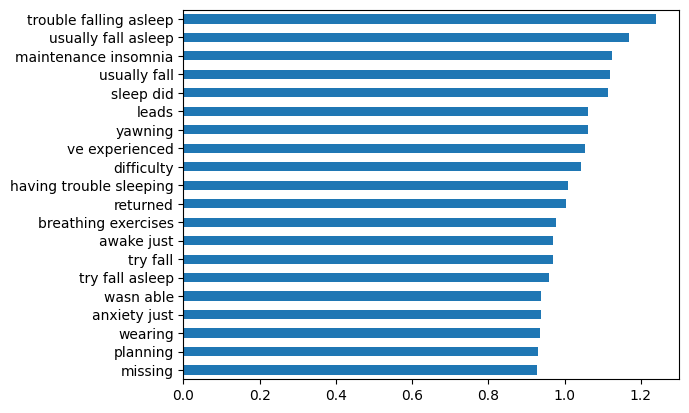

In [92]:
feat_importances  = pd.Series(abs(model2.coef_[0]), index=X_train.columns)
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')

<Axes: >

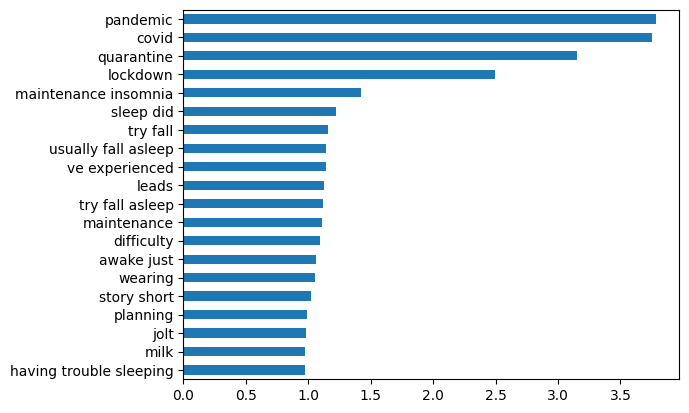

In [85]:
feat_importances  = pd.Series(abs(model2.coef_[0]), index=X_train.columns)
feat_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')